In [3]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.2 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp311-cp311-macosx_11_0_arm64.whl size=246654 sha256=de21fd5ec6a3a97783f5b32d3a8889bdad8debb1a73a84b76af9a02c931f0805
  Stored in directory: /Users/daedaemacbook/Library/Caches/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee


# Question 1 - Extracting Tesla Stock Data Using yfinance

In [4]:
# Importing necessary libraries
import yfinance as yf

# Downloading Tesla stock data
tesla_data = yf.Ticker("TSLA")

# Getting historical market data for Tesla
tesla_stock_data = tesla_data.history(period="max")

# Display the first few rows of Tesla stock data
tesla_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Web Scraping

In [34]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup

# Sending a request to the web page containing Tesla's revenue data
url = 'https://stockanalysis.com/stocks/tsla/revenue/'
response = requests.get(url)

# Verifying if the page was loaded correctly
if response.status_code == 200:
    print("Page loaded successfully.")
else:
    print("Failed to retrieve the page. Status code:", response.status_code)

# Parsing the page
soup = BeautifulSoup(response.text, 'html.parser')

# Debugging: Check if any tables are found
tables = soup.find_all('table')
tesla_revenue = tables[0]  # Assuming the revenue table is the first table

# Parsing and converting the scraped data to a DataFrame
import pandas as pd
tesla_revenue_df = pd.read_html(str(tesla_revenue))[0]

# Display the first few rows of the revenue data
tesla_revenue_df.head()


Page loaded successfully.


/var/folders/4v/pg3vbgqs1t57fx7m5_9f6vt40000gn/T/ipykernel_62507/2955880953.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue_df = pd.read_html(str(tesla_revenue))[0]


,Fiscal Year End,Revenue,Change,Growth
0,"Dec 31, 2023",96.77B,15.31B,18.80%
1,"Dec 31, 2022",81.46B,27.64B,51.35%
2,"Dec 31, 2021",53.82B,22.29B,70.67%
3,"Dec 31, 2020",31.54B,6.96B,28.31%
4,"Dec 31, 2019",24.58B,3.12B,14.52%


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [23]:
# Downloading GameStop stock data
gamestop_data = yf.Ticker("GME")

# Getting historical market data for GameStop
gamestop_stock_data = gamestop_data.history(period="max")

# Display the first few rows of GameStop stock data
gamestop_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Web Scraping

In [35]:
# Sending a request to the web page containing GameStop's revenue data
url = 'https://stockanalysis.com/stocks/gme/revenue/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Scraping GameStop revenue data
tables = soup.find_all('table')
gamestop_revenue = tables[0]  # Assuming the revenue table is the first table

# Parsing and converting the scraped data to a DataFrame
gamestop_revenue_df = pd.read_html(str(gamestop_revenue))[0]

# Display the first few rows of the revenue data
gamestop_revenue_df.head()

/var/folders/4v/pg3vbgqs1t57fx7m5_9f6vt40000gn/T/ipykernel_62507/2016719466.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue_df = pd.read_html(str(gamestop_revenue))[0]


,Fiscal Year End,Revenue,Change,Growth
0,"Feb 3, 2024",5.27B,-654.40M,-11.04%
1,"Jan 28, 2023",5.93B,-83.50M,-1.39%
2,"Jan 29, 2022",6.01B,920.90M,18.09%
3,"Jan 30, 2021",5.09B,-1.38B,-21.28%
4,"Feb 1, 2020",6.47B,-1.82B,-21.96%


# Question 5 - Tesla Stock and Revenue Dashboard

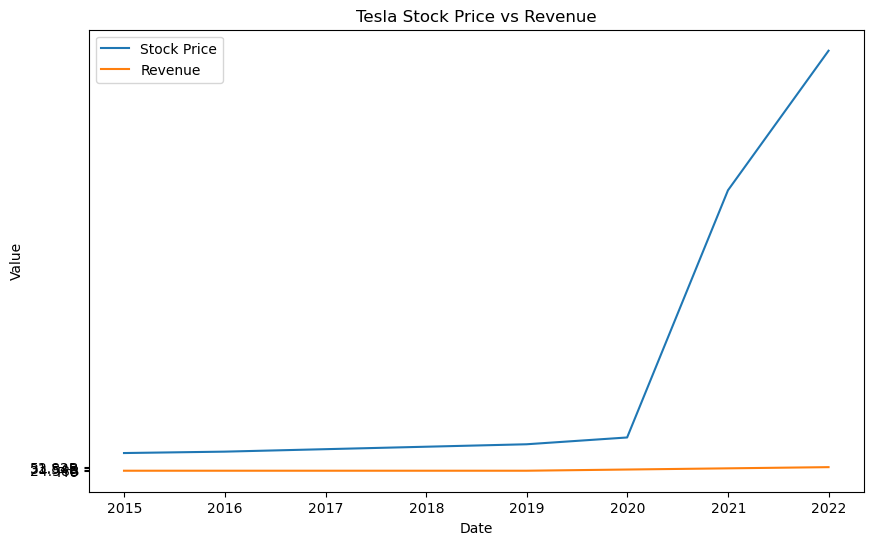

Index(['Date', 'Revenue', 'Change', 'Growth'], dtype='object')


In [45]:
# Rename the date column if necessary
tesla_revenue_df.rename(columns={'Fiscal Year End': 'Date'}, inplace=True)

# Remove the timezone from the tesla_stock_data index and ensure both datasets have the same Date format

tesla_stock_data.index = tesla_stock_data.index.tz_localize(None)
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date'], errors='coerce')

# Merging Tesla stock data with Tesla revenue data for visualization
tesla_combined_data = tesla_stock_data.merge(tesla_revenue_df, left_index=True, right_on='Date')

# Plotting Tesla stock price vs revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(tesla_combined_data['Date'], tesla_combined_data['Close'], label="Stock Price")
plt.plot(tesla_combined_data['Date'], tesla_combined_data['Revenue'], label="Revenue")
plt.title('Tesla Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print(tesla_revenue_df.columns)



# Question 6 - GameStop Stock and Revenue Dashboard

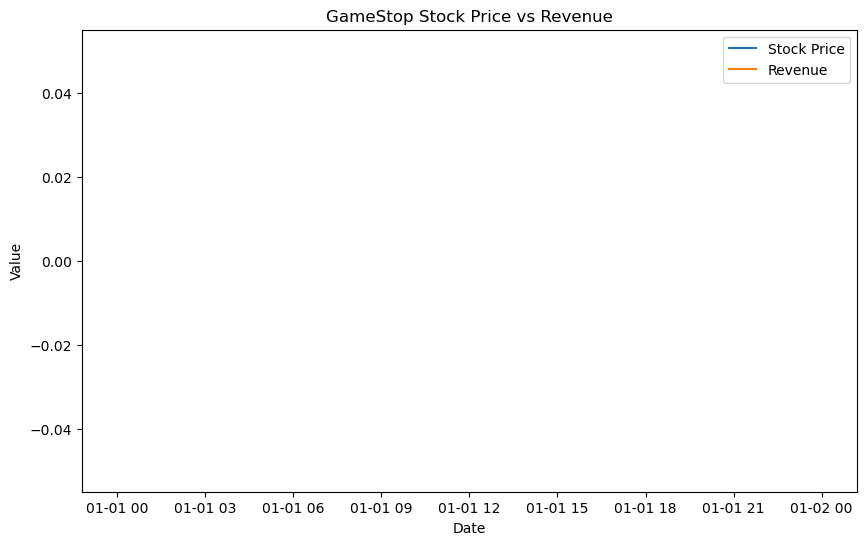

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits, Date, Revenue, Change, Growth]
Index: []
DatetimeIndex(['2002-02-13', '2002-02-14', '2002-02-15', '2002-02-19',
               '2002-02-20', '2002-02-21', '2002-02-22', '2002-02-25',
               '2002-02-26', '2002-02-27',
               ...
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
               '2024-09-26', '2024-09-27'],
              dtype='datetime64[ns]', name='Date', length=5695, freq=None)
0   2024-02-03
1   2023-01-28
2   2022-01-29
3   2021-01-30
4   2020-02-01
Name: Date, dtype: datetime64[ns]


In [49]:
# Rename the date column if necessary
gamestop_revenue_df.rename(columns={'Fiscal Year End': 'Date'}, inplace=True)

# Remove the timezone from the tesla_stock_data index and ensure both datasets have the same Date format

gamestop_stock_data.index = gamestop_stock_data.index.tz_localize(None)
gamestop_revenue_df['Date'] = pd.to_datetime(gamestop_revenue_df['Date'], errors='coerce')

# Merging GameStop stock data with GameStop revenue data for visualization
gamestop_combined_data = gamestop_stock_data.merge(gamestop_revenue_df, left_index=True, right_on='Date')

# Plotting GameStop stock price vs revenue
plt.figure(figsize=(10,6))
plt.plot(gamestop_combined_data['Date'], gamestop_combined_data['Close'], label="Stock Price")
plt.plot(gamestop_combined_data['Date'], gamestop_combined_data['Revenue'], label="Revenue")
plt.title('GameStop Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print(gamestop_combined_data.head())
print(gamestop_stock_data.index)
print(gamestop_revenue_df['Date'].head())